In [1]:
%load_ext watermark
%watermark

%load_ext autoreload
%autoreload 2


# import standard libs
from IPython.display import display
from IPython.core.debugger import set_trace as bp
from pathlib import PurePath, Path
import sys
import time
from collections import OrderedDict as od
import re
import os
import json
import datetime
import pickle


# import python scientific stack
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)
from dask import dataframe as dd
from dask.diagnostics import ProgressBar
from multiprocessing import cpu_count
pbar = ProgressBar()
pbar.register()
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from numba import jit
import math
# import ffn


# import visual tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-talk')
plt.style.use('bmh')
#plt.rcParams['font.family'] = 'DejaVu Sans Mono'
plt.rcParams['font.size'] = 9.5
plt.rcParams['font.weight'] = 'medium'
plt.rcParams['figure.figsize'] = 10,7
blue, green, red, purple, gold, teal = sns.color_palette('colorblind', 6)

RANDOM_STATE = 777

print()

Last updated: 2024-09-21T09:26:31.711772-04:00

Python implementation: CPython
Python version       : 3.8.19
IPython version      : 8.12.2

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit




/var/folders/j0/8v9qcjfx15g5ftmsy5n0qrq80000gn/T/ipykernel_21486/2173331131.py:46: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


In [2]:
import os

# Run the setup script
%run ../../config/setup_project.py

# Call the function to set up the project path
setup_project_path()

# Now you can import your modules
from src.utils import helper as h_
import src.ch_02.code_ch_02 as f_ch2
import src.ch_03.code_ch_03 as f_ch3
import src.ch_04.code_ch_04 as f_ch4
import src.ch_05.code_ch_05 as f_ch5
import src.ch_06.code_ch_06 as f_ch6
import src.ch_07.code_ch_07 as f_ch7
import src.ch_08.code_ch_08 as f_ch8


Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config']
Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
Current sys.path: ['/Users/paulkelendji/miniconda3/envs/financ

## 8.1 Using the code presented in Section 8.6:
#### (a) Generate a dataset (X, y).

In [3]:
# Dataset
X, cont = f_ch8.getTestData(n_features=6, n_informative=2, n_redundant=3, n_samples=10000)

print(X.head())
print(cont.head())

                 I_0       I_1       R_0       R_1       R_2       N_0
1900-01-01 -0.852556  1.003125 -0.749602  0.201990  0.729078  0.405183
1900-01-02 -0.161713  1.556664 -0.396463  0.847975  0.706700  0.204002
1900-01-03 -1.368833  0.117766 -0.925728 -0.560268  0.549581 -0.822766
1900-01-04 -1.058059 -0.183791 -0.664412 -0.595913  0.310484 -1.276874
1900-01-05 -0.846001 -0.806505 -0.408511 -0.867298 -0.026112 -0.226437
            bin       w                            t1
1900-01-01    0  0.0001 1900-01-05 19:03:25.884760904
1900-01-02    0  0.0001 1900-01-03 12:01:57.373220035
1900-01-03    0  0.0001 1900-01-29 20:44:52.301932477
1900-01-04    0  0.0001 1900-01-07 10:15:00.397779168
1900-01-05    0  0.0001 1900-01-31 20:41:07.092991086


#### (b) Apply a PCA transformation on X, which we denote by X_pca.

In [4]:
X_pca = f_ch8.orthoFeats(X)
X_pca = pd.DataFrame(X_pca, index=X.index)
# name each column "pca_i" where i is the index of the column
X_pca.columns = ["pca_%d" % i for i in range(X_pca.shape[1])]
X_pca

,pca_0,pca_1,pca_2
1900-01-01,1.763654,0.152787,-0.418803
1900-01-02,1.523970,-0.866472,-0.235102
1900-01-03,1.539948,1.194211,0.833923
1900-01-04,0.955369,1.085911,1.290463
1900-01-05,0.186790,1.308391,0.245039
...,...,...,...
1938-04-25,-1.706610,1.887436,-0.664066
1938-04-26,-1.767150,0.772812,0.439402
1938-04-27,-0.104035,-2.482043,0.571388
1938-04-28,-0.115712,-1.779633,0.014782


Explained Variance by Principal Component:
PC1: 0.5268
PC2: 0.3246
PC3: 0.1486
PC4: 0.0000
PC5: 0.0000
PC6: 0.0000
PCA Loadings (Feature Contributions to Components):
          PC1       PC2       PC3           PC4           PC5           PC6
I_0  0.210397  0.719025 -0.006318  4.264142e-01 -2.157971e-01  4.585839e-01
I_1  0.768955 -0.223949 -0.008581 -2.367048e-01 -5.485144e-01 -3.979328e-02
R_0 -0.004178  0.516433 -0.002575 -3.270937e-02 -1.413272e-01 -8.439368e-01
R_1  0.552490  0.198252 -0.007992 -2.059466e-01  7.829126e-01 -4.519296e-03
R_2  0.242936 -0.356114 -0.001259  8.477369e-01  1.401360e-01 -2.754408e-01
N_0 -0.012639 -0.005087 -0.999907 -4.251067e-17 -3.124104e-16 -1.398926e-16


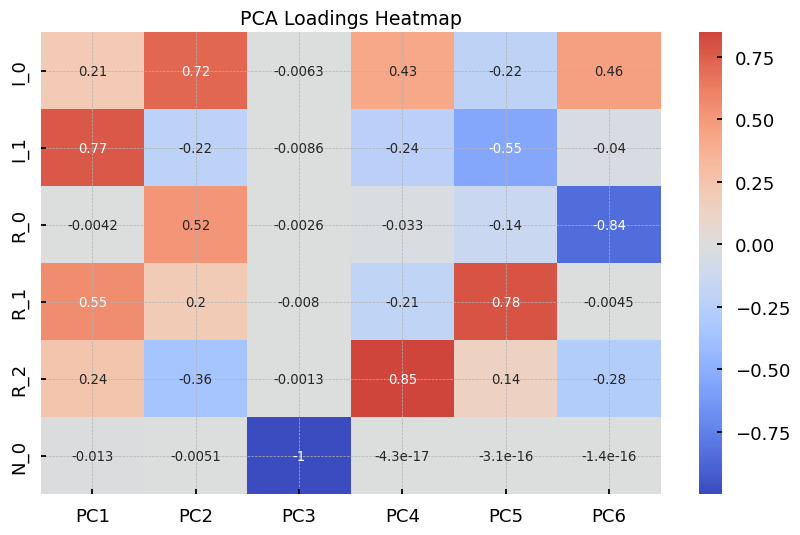

In [5]:
# Calculate explained variance (if applicable)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_

# Display the explained variance by each principal component
print("Explained Variance by Principal Component:")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

# Loadings: how much each feature contributes to each principal component
pca_loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=[f'PC{i+1}' for i in range(len(X.columns))])

print("PCA Loadings (Feature Contributions to Components):")
print(pca_loadings)

# Visualize the loadings with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pca_loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()


### (c) Compute MDI, MDA, and SFI feature importance on (̇ X, y), where the base estimator is RF.

In [6]:
f_ch4.main(cont['t1'], sLength=100)

Standard uniqueness: 0.9426420123993654


Sequential Bootstrap Progress:  50%|█████     | 50/100 [1:08:09<1:48:07, 129.75s/it]

Sample length: 50
Sequential uniqueness: 1.0



Sequential Bootstrap Progress: 100%|██████████| 100/100 [3:48:12<00:00, 136.93s/it] 

Sample length: 100
Sequential uniqueness: 0.9867942014126224

Sequential uniqueness: 0.9867942014126224


[4540,
 4387,
 6351,
 6293,
 2452,
 5068,
 6910,
 8684,
 2973,
 9586,
 1736,
 2427,
 7898,
 7360,
 6313,
 2068,
 2864,
 465,
 3749,
 4179,
 5841,
 7589,
 261,
 4576,
 5132,
 4600,
 4797,
 7568,
 5688,
 483,
 5182,
 3959,
 6786,
 4139,
 8588,
 5916,
 6080,
 7470,
 47,
 8080,
 6430,
 4829,
 7330,
 9886,
 2023,
 6232,
 8790,
 5278,
 1716,
 7309,
 1041,
 1252,
 1310,
 521,
 9931,
 5000,
 3596,
 151,
 4345,
 1032,
 1170,
 2177,
 1558,
 3977,
 1015,
 452,
 3624,
 7425,
 8390,
 1283,
 399,
 1635,
 5466,
 6650,
 1489,
 7283,
 5865,
 9200,
 5117,
 3521,
 837,
 9272,
 9001,
 5599,
 773,
 3664,
 3483,
 7024,
 8464,
 9369,
 9030,
 6279,
 4949,
 2482,
 3043,
 6887,
 6841,
 5467,
 9870,
 9019]

In [7]:
# Libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Bagging classifier on RF where max_samples is set to average uniqueness
clf2 = RandomForestClassifier(
    n_estimators=1,  # 1 tree
    criterion="entropy",  # information gain
    bootstrap=False,  # no bootstrap
    class_weight="balanced_subsample"  # prevent minority class from being ignored
)

clf2 = BaggingClassifier(
    estimator=clf2,  # base estimator
    n_estimators=1_000,  # 1_000 trees
    max_samples=0.94,  # average uniqueness
    max_features=1.0  # all features for bagging
)

Running feature importance for MDI...


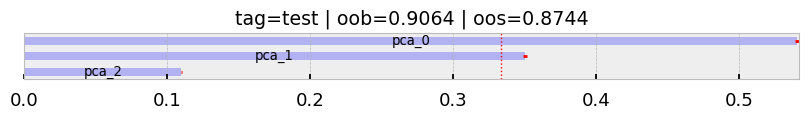

Running feature importance for MDA...


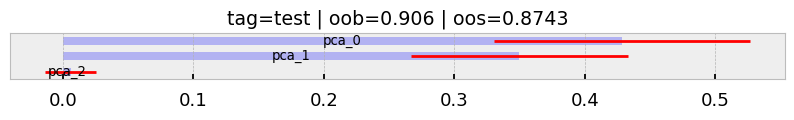

Running feature importance for SFI...
Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management
Config path added to sys.path:Project root added to sys.path: /Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config
 Current sys.path:/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management 
['/Users/paulkelendji/miniconda3/envs/financial_math/lib/python38.zip', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/lib-dynload', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/src/ch_08', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages', '/Users/paulkelendji/miniconda3/envs/financial_math/lib/python3.8/site-packages/setuptools/_vendor', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Management/config', '/Users/paulkelendji/Desktop/GitHub_paul/ML-Asset_Man

2024-09-21 13:24:59.056580 100.0% auxFeatImpSFI done after 5.4 minutes. Remaining 0.0 minutes.s.


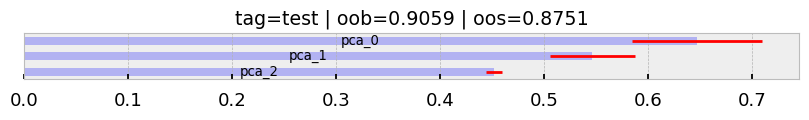

In [8]:
methods = ['MDI', 'MDA', 'SFI']

n_estimators = 1000  # Number of trees in the random forest
cv = 10  # Number of cross-validation folds
max_samples = 1.0  # Use the entire dataset for each tree
numThreads = 4  # Adjust based on your available computational resources
pctEmbargo = 0  # No embargo for simplicity

for method in methods:
    print(f"Running feature importance for {method}...")
    imp, oob, oos = f_ch8.featImportance(pd.DataFrame(X_pca), cont, n_estimators=n_estimators, cv=cv,
                                    max_samples=max_samples, numThreads=numThreads, 
                                    pctEmbargo=pctEmbargo, method=method)
    
    # Plot the feature importance using the provided function
    f_ch8.plotFeatImportance(pathOut='./', imp=imp, oob=oob, oos=oos, method=method, tag='test', simNum=0)


## 8.2 From exercise 1, generate a new dataset (̈ X, y), wherë X is a feature union of X and X_pca

In [ ]:
# X_2 = concat X and X_pca
X_2 = pd.concat([X, X_pca], axis=1)
X_2

#### (a) Compute MDI, MDA, and SFI feature importance on (̈ X, y), where the base estimator is RF

In [ ]:
methods = ['MDI', 'MDA', 'SFI']

n_estimators = 1000  # Number of trees in the random forest
cv = 10  # Number of cross-validation folds
max_samples = 1.0  # Use the entire dataset for each tree
numThreads = 4  # Adjust based on your available computational resources
pctEmbargo = 0  # No embargo for simplicity

for method in methods:
    print(f"Running feature importance for {method}...")
    imp, oob, oos = f_ch8.featImportance(X_2, cont, n_estimators=n_estimators, cv=cv,
                                    max_samples=max_samples, numThreads=numThreads, 
                                    pctEmbargo=pctEmbargo, method=method)
    
    # Plot the feature importance using the provided function
    f_ch8.plotFeatImportance(pathOut='./', imp=imp, oob=oob, oos=oos, method=method, tag='test', simNum=0)

## 8.3 Take the results from exercise 2
#### (a) Drop the most important features according to each method, resulting in a features matrix⃛ X.
#### (b) Compute MDI, MDA, and SFI feature importance on (⃛ X, y), where the base estimator is RF

In [ ]:
methods = ['MDI', 'MDA', 'SFI']
method = methods[0]

X_mdi = X_2.drop(columns=['pca_0'])
X_mda = X_2.drop(columns=['pca_1'])
X_sfi = X_2.drop(columns=['I_1'])

X_method = zip([X_mdi, X_mda, X_sfi], methods)

n_estimators = 1000  # Number of trees in the random forest
cv = 10  # Number of cross-validation folds
max_samples = 1.0  # Use the entire dataset for each tree
numThreads = 4  # Adjust based on your available computational resources
pctEmbargo = 0  # No embargo for simplicity

for X_, method in X_method:
    print(f"Running feature importance for {method}...")
    imp, oob, oos = f_ch8.featImportance(X_, cont, n_estimators=n_estimators, cv=cv,
                                    max_samples=max_samples, numThreads=numThreads, 
                                    pctEmbargo=pctEmbargo, method=method)
    
    # Plot the feature importance using the provided function
    f_ch8.plotFeatImportance(pathOut='./', imp=imp, oob=oob, oos=oos, method=method, tag='test', simNum=0)


# 8.4 Using the code presented in Section 8.6

### (a) Generate a dataset (X, y) of 1E6 observations, where 5 features are informative, 5 are redundant and 10 are noise.

In [ ]:
# Dataset
X, y = f_ch8.getTestData(
    n_features=20, n_informative=5, n_redundant=5, n_samples=1_000_000, time_unit="H"
)

print(X.head())
print(cont.head())

## (b) Split (X, y) into 10 datasets {(Xi, yi)}i=1,…,10 , each of 1E5 observations.

In [9]:
# Split the dataset into 10 parts, each containing 100,000 samples
X_splits = np.array_split(X, 10)
y_splits = np.array_split(y, 10)


### (c) Compute the parallelized feature importance (Section 8.5), on each of the 10 datasets, {(Xi, yi)}i=1,…,10 .

In [ ]:
# Parameters for feature importance calculation
n_estimators = 1_000  # Number of trees in the random forest
cv = 3  # Number of cross-validation folds
max_samples = 1.0  # Use the entire dataset for each tree
numThreads = 4  # Adjust based on your available computational resources
pctEmbargo = 0  # No embargo for simplicity
method = 'MDA'  # or 'MDA', 'SFI', 'MDI'

# Store the feature importances for each split
all_importances = []

for i, (X_split, y_split) in enumerate(zip(X_splits, y_splits)):
    print(f"Processing dataset split {i + 1}/10...")

    # Combine X and y into a 'cont' DataFrame as required by the function
    cont_split = y_split.copy()  # y_split is already a DataFrame with 'bin' column and 'w' (weights)
    cont_split['w'] = 1.0 / cont_split.shape[0]
    
    # Compute feature importance for the split
    imp, oob, oos = f_ch8.featImportance(
        trnsX=X_split, 
        cont=cont_split, 
        n_estimators=n_estimators, 
        cv=cv,
        max_samples=max_samples, 
        numThreads=numThreads, 
        pctEmbargo=pctEmbargo, 
        method=method
    )
    
    # Store the importance for this split
    all_importances.append(imp)
    
    print(f"Out-of-bag score (split {i + 1}): {oob}")
    print(f"Out-of-sample score (split {i + 1}): {oos}")

# Now you have `all_importances` which contains feature importances for each split


In [11]:
# Parameters for feature importance calculation
n_estimators = 1_000  # Number of trees in the random forest
cv = 3  # Number of cross-validation folds
max_samples = 1.0  # Use the entire dataset for each tree
numThreads = 4  # Adjust based on your available computational resources
pctEmbargo = 0  # No embargo for simplicity
method = 'MDI'  # or 'MDA', 'SFI', 'MDI'

imp, oob, oos = f_ch8.featImportance(
                trnsX=X_2, 
                cont=cont, 
                n_estimators=n_estimators, 
                cv=cv,
                max_samples=max_samples, 
                numThreads=numThreads, 
                pctEmbargo=pctEmbargo, 
                method=method
            )

In [ ]:
imp